Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [82]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

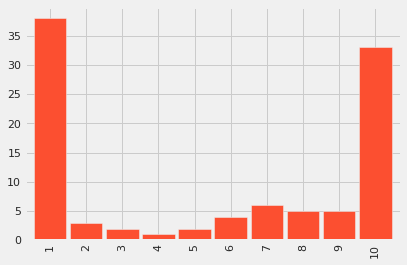

In [83]:
# Your Work Here

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

fte_series_1 = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index=range(1,11))

fte_series_1.plot.bar(color='C1', width=0.9);

display(example)

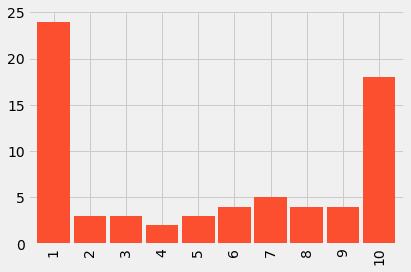

In [0]:
fte_series_2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fte_series_2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

display(example)

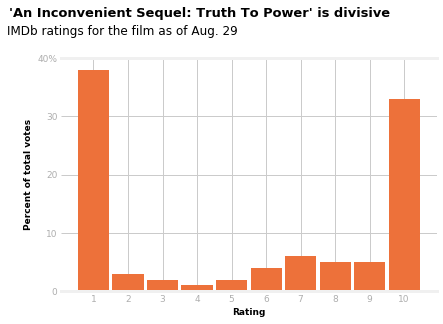

In [0]:
f1, a1 = plt.subplots() #f and a variables initialized

a1.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fte_series_1, color='#ED713A', width=0.9) #color and shape of the bars

f1.set_facecolor(color='None') #figure bg color is white/none
a1.set_facecolor(color='None') #axis bg color is white/none

a1.set_xticks(range(1,11,1)) #x axis ticks, 1 to 10, 1 each
a1.set_yticks(range(0,50,10)) #y axis ticks, 0 to 40, 10 each

a1.set_xticklabels(range(1,11,1), fontsize=9, color="#AEAEAE") #label style for x axis
a1.set_yticklabels([0,10,20,30,"40%"], fontsize=9, color="#AEAEAE") #label style for y axis

a1.spines['left'].set_visible(False) #remove left spine
a1.spines['right'].set_visible(False) #remove right spine

a1.set_xlabel("Rating", fontsize=9, fontweight=1000) #axis labels
a1.set_ylabel("Percent of total votes", fontsize=9, fontweight=1000)

a1.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=13, x=.37, y=1.15, fontweight='bold') #graph title
a1.text(s="IMDb ratings for the film as of Aug. 29", y=44, x=-1.5, fontsize=12) #graph subtitle

plt.show() #displays graph and removes the debug text that usually displays

display(example)

#this is close to the example version given with some minimal text adjustment for the axes

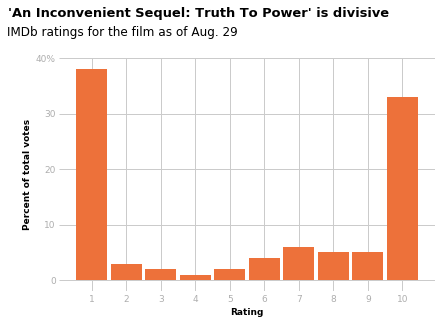

In [0]:
f1, a1 = plt.subplots() #f and a variables initialized

a1.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fte_series_1, color='#ED713A', width=0.9) #color and shape of the bars

f1.set_facecolor(color='None') #figure bg color is white/none
a1.set_facecolor(color='None') #axis bg color is white/none

a1.set_xticks([1,2,3,4,5,6,7,8,9,10]) #x axis ticks
a1.set_yticks([-2,0,10,20,30,40]) #y axis ticks - adjusted to get those tick marks

a1.set_xticklabels([1,2,3,4,5,6,7,8,9,10], fontsize=9, color="#AEAEAE") #label style for x axis
a1.set_yticklabels(['','0','10','20','30','40%'], fontsize=9, color="#AEAEAE") #label style for y axis, added '' at the start to ignore the -2 tick location

a1.spines['top'].set_visible(False) #remove top spine
a1.spines['left'].set_visible(False) #remove left spine
a1.spines['right'].set_visible(False) #remove right spine
a1.spines['bottom'].set_visible(False) #remove bottom spine

a1.set_xlabel("Rating", fontsize=9, fontweight=1000) #axis labels
a1.set_ylabel("Percent of total votes", fontsize=9, fontweight=1000)

a1.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=13, x=.37, y=1.15, fontweight='bold') #graph title
a1.text(s="IMDb ratings for the film as of Aug. 29", y=44, x=-1.45, fontsize=12) #graph subtitle

plt.show() #displays graph and removes the debug text that usually displays

display(example)

#this is just an attempt at getting those tick marks on the x axis above the "rating" text to display properly

In [85]:
url2 = "https://fivethirtyeight.com/wp-content/uploads/2018/10/actblue-1.png"
example2 = Image(url=url2, width=400)
display(example2)

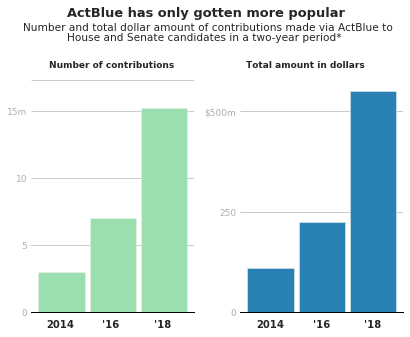

In [251]:
f2, axes = plt.subplots(nrows=1,ncols=2)
a2, a3 = axes.flatten()

a2.bar(x=[1,2,3], height=[3,7,15.2], color='#9BDEB0', width=0.9)
a3.bar(x=[1,2,3], height=[110,225,550], color='#2980B3', width=0.9)

f2.tight_layout(pad=1.5)

f2.set_facecolor(color='None') #figure bg color is white/none
a2.set_facecolor(color='None') #axis bg color is white/none
a3.set_facecolor(color='None') #axis bg color is white/none

a2.set_xticks([]) #x axis ticks = blank
a2.set_yticks([0,5,10,15,17.3]) #y axis ticks - adjusted to get those tick marks

a3.set_xticks([]) #x axis ticks = blank
a3.set_yticks([0,250,500]) #y axis ticks - adjusted to get those tick marks

a2.spines['top'].set_visible(False) #remove top spine, and I have literally no idea why this doesn't work
                                    # I even tried checking individual ticks, both, major, minor, etc., and set line color to none, white, linewidth to 0, set_visible(False) etc., and
                                    # literally nothing worked to get rid of the top tick/spine (I don't think it's a spine)

a2.spines['left'].set_visible(False) #remove left spine
a2.spines['right'].set_visible(False) #remove right spine
a2.spines['bottom'].set_edgecolor('#000000')
a2.spines['bottom'].set_linewidth(1)

a3.spines['top'].set_visible(False) #remove top spine
a3.spines['left'].set_visible(False) #remove left spine
a3.spines['right'].set_visible(False) #remove right spine
a3.spines['bottom'].set_edgecolor('#000000')
a3.spines['bottom'].set_linewidth(1)

a2.set_xticklabels(["","2014","'16","'18"], fontsize=9, color="#000000", fontweight=1000) #label style for x axis
a2.set_yticklabels(["0","5","10","15m"], fontsize=9, color="#AEAEAE") #label style for y axis

a3.set_xticklabels(["","2014","'16","'18"], fontsize=9, color="#000000", fontweight=1000) #label style for x axis
a3.set_yticklabels(["0","250","$500m"], fontsize=9, color="#AEAEAE") #label style for y axis

a2.set_title("\n\n\n", fontsize=13, x=.37, y=1.15, fontweight='bold',loc='left') #lazy spacing
a2.text(s="ActBlue has only gotten more popular", y=22, x=1.1, fontsize=13, fontweight='bold') #graph title
a2.text(s="Number and total dollar amount of contributions made via ActBlue to", y=21, x=.25, fontsize=10.5) #graph subtitle
a2.text(s="House and Senate candidates in a two-year period*", y=20.2, x=1.1, fontsize=10.5) #graph subtitle

a2.text(s="Number of contributions", y=18.2, x=.75, fontsize=9, fontweight='bold') #graph subtitle
a2.text(s="Total amount in dollars", y=18.2, x=4.6, fontsize=9, fontweight='bold') #graph subtitle

a2.text(s="2014", y=-1.15, x=0.7, fontsize=10, fontweight='bold') #easier to do the axis labels this way after completely removing them
a2.text(s="'16", y=-1.15, x=1.8, fontsize=10, fontweight='bold')
a2.text(s="'18", y=-1.15, x=2.8, fontsize=10, fontweight='bold')
a2.text(s="2014", y=-1.15, x=4.8, fontsize=10, fontweight='bold')
a2.text(s="'16", y=-1.15, x=5.9, fontsize=10, fontweight='bold')
a2.text(s="'18", y=-1.15, x=6.9, fontsize=10, fontweight='bold') # and looking at 538's image, I think they did the same thing too lol. Look at the 2014 labels!

plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


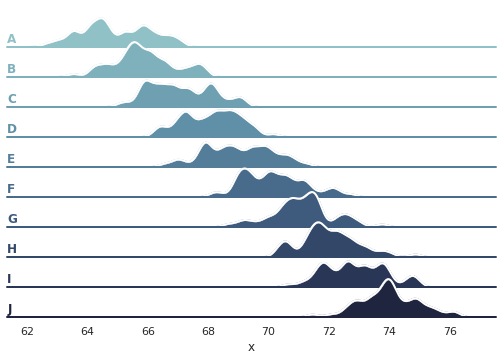

In [0]:
# Just a cool one I saw and put it here, didn't get to the stretch options

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)